# Analise de emprestimos dos acervos do sistema de bibliotecas UFRN

## Dia 1

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [48]:
raw='https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20201.csv'

In [49]:
emprestimos_biblioteca = pd.read_csv(raw)

In [50]:
for ano in range(2010,2020):
    for semestre in range(1,3):
        ref=str(ano)+str(semestre)
        raw=(f'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-{ref}.csv')
        dados = pd.read_csv(raw)
        emprestimos_biblioteca=pd.concat([emprestimos_biblioteca,dados],ignore_index=True)

In [51]:
emprestimos_biblioteca

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,2962509,2007005628,NaN,2020/01/02 08:17:30.290000000,2020/01/07 11:14:07.000000000,2.018103e+10,ALUNO DE PÓS-GRADUAÇÃO
1,2962510,L202802,NaN,2020/01/02 08:17:30.391000000,2020/01/07 11:14:17.000000000,2.018103e+10,ALUNO DE PÓS-GRADUAÇÃO
2,2962511,2012008328,NaN,2020/01/02 08:17:30.436000000,2020/01/07 11:24:46.000000000,2.018103e+10,ALUNO DE PÓS-GRADUAÇÃO
3,2962512,2012055016,2020/01/17 09:56:18.380000000,2020/01/02 08:36:40.163000000,2020/01/31 14:53:52.000000000,2.019015e+10,ALUNO DE GRADUAÇÃO
4,2962513,L197391,2020/01/17 23:50:18.862000000,2020/01/02 09:36:03.877000000,2020/01/24 08:18:19.000000000,2.018005e+10,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
2258013,2962504,2008047075,2020/01/13 23:27:18.346000000,2019/12/30 17:48:52.962000000,2020/01/15 18:52:27.000000000,2.019006e+10,ALUNO DE GRADUAÇÃO
2258014,2962505,2014078494,2020/01/13 23:27:18.327000000,2019/12/30 17:48:52.998000000,2020/01/15 15:28:51.000000000,2.019006e+10,ALUNO DE GRADUAÇÃO
2258015,2962506,2018014453,2020/01/13 23:27:18.302000000,2019/12/30 17:48:53.039000000,2020/01/15 15:29:08.000000000,2.019006e+10,ALUNO DE GRADUAÇÃO
2258016,2962507,2010073307,NaN,2019/12/30 18:05:30.265000000,2020/01/29 16:05:27.000000000,2.018102e+10,ALUNO DE PÓS-GRADUAÇÃO


In [52]:
emprestimos_biblioteca = emprestimos_biblioteca.drop_duplicates()

In [53]:
dados_exemplares = pd.read_parquet('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet')
dados_exemplares

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


In [54]:
emprestimos_completos = pd.merge(emprestimos_biblioteca,dados_exemplares)
emprestimos_completos

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,2962509,2007005628,NaN,2020/01/02 08:17:30.290000000,2020/01/07 11:14:07.000000000,2.018103e+10,ALUNO DE PÓS-GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640,87626
1,950022,2007005628,2011/04/04 01:47:09.969000000,2011/03/18 18:00:22.565000000,2011/04/19 13:25:25.000000000,2.008014e+09,ALUNO DE GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640,87626
2,1035255,2007005628,2011/08/03 23:05:38.078000000,2011/07/19 16:11:47.974000000,2011/08/11 14:14:43.000000000,2.008014e+09,ALUNO DE GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640,87626
3,1561538,2007005628,2013/09/08 10:37:23.440000000,2013/08/09 18:12:29.449000000,2013/09/30 12:51:45.000000000,2.011102e+09,ALUNO DE PÓS-GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640,87626
4,1677467,2007005628,2014/02/18 00:51:34.622000000,2014/02/03 17:54:46.870000000,2014/03/11 19:05:51.000000000,2.011052e+09,ALUNO DE GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640,87626
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2962422,2008034542,NaN,2019/12/27 17:31:10.417000000,2020/02/07 14:04:23.000000000,2.019101e+10,ALUNO DE PÓS-GRADUAÇÃO,249379,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,696,85591
2072518,2962432,2018030710,NaN,2019/12/27 19:07:44.519000000,2020/01/10 19:13:28.000000000,2.016010e+10,ALUNO DE GRADUAÇÃO,1340245,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,913,263572
2072519,2962453,2016002671,NaN,2019/12/30 11:05:00.992000000,2020/01/15 15:14:48.000000000,2.017103e+10,ALUNO DE PÓS-GRADUAÇÃO,1300596,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,834,250432
2072520,2962461,2011032284,NaN,2019/12/30 11:38:19.107000000,2020/01/13 09:06:24.000000000,2.013025e+09,ALUNO DE GRADUAÇÃO,932237,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,672,135259


## Dia 2

In [55]:
emprestimos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           int64  
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           int64  
 12  registro_sistema      int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 205.6+ MB


In [56]:
emprestimos_completos = emprestimos_completos.drop('registro_sistema', axis=1)
emprestimos_completos['matricula_ou_siape'] = emprestimos_completos['matricula_ou_siape'].astype('string')
emprestimos_completos

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,2962509,2007005628,NaN,2020/01/02 08:17:30.290000000,2020/01/07 11:14:07.000000000,20181028903.0,ALUNO DE PÓS-GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640
1,950022,2007005628,2011/04/04 01:47:09.969000000,2011/03/18 18:00:22.565000000,2011/04/19 13:25:25.000000000,2008013855.0,ALUNO DE GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640
2,1035255,2007005628,2011/08/03 23:05:38.078000000,2011/07/19 16:11:47.974000000,2011/08/11 14:14:43.000000000,2008013928.0,ALUNO DE GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640
3,1561538,2007005628,2013/09/08 10:37:23.440000000,2013/08/09 18:12:29.449000000,2013/09/30 12:51:45.000000000,2011101560.0,ALUNO DE PÓS-GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640
4,1677467,2007005628,2014/02/18 00:51:34.622000000,2014/02/03 17:54:46.870000000,2014/03/11 19:05:51.000000000,2011051825.0,ALUNO DE GRADUAÇÃO,216276,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,640
...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2962422,2008034542,NaN,2019/12/27 17:31:10.417000000,2020/02/07 14:04:23.000000000,20191008539.0,ALUNO DE PÓS-GRADUAÇÃO,249379,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,696
2072518,2962432,2018030710,NaN,2019/12/27 19:07:44.519000000,2020/01/10 19:13:28.000000000,20160100835.0,ALUNO DE GRADUAÇÃO,1340245,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,913
2072519,2962453,2016002671,NaN,2019/12/30 11:05:00.992000000,2020/01/15 15:14:48.000000000,20171025200.0,ALUNO DE PÓS-GRADUAÇÃO,1300596,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,834
2072520,2962461,2011032284,NaN,2019/12/30 11:38:19.107000000,2020/01/13 09:06:24.000000000,2013024630.0,ALUNO DE GRADUAÇÃO,932237,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,672


In [57]:
condicoes = [
    (emprestimos_completos['localizacao'] >= 900),
    (emprestimos_completos['localizacao'] >= 800) & (emprestimos_completos['localizacao'] < 900),
    (emprestimos_completos['localizacao'] >= 700) & (emprestimos_completos['localizacao'] < 800),
    (emprestimos_completos['localizacao'] >= 600) & (emprestimos_completos['localizacao'] < 700),
    (emprestimos_completos['localizacao'] >= 500) & (emprestimos_completos['localizacao'] < 600),
    (emprestimos_completos['localizacao'] >= 400) & (emprestimos_completos['localizacao'] < 500),
    (emprestimos_completos['localizacao'] >= 300) & (emprestimos_completos['localizacao'] < 400),
    (emprestimos_completos['localizacao'] >= 200) & (emprestimos_completos['localizacao'] < 300),
    (emprestimos_completos['localizacao'] >= 100) & (emprestimos_completos['localizacao'] < 200),
    (emprestimos_completos['localizacao'] < 100)
]

CDU = ['Geografia. Biografia. História', 'Linguagem. Língua. Linguística', 'Belas artes', 
       'Ciências aplicadas','Matemática e ciências naturais',
       'Classe vaga. Provisoriamente não ocupada.','Ciências sociais.','Religião.',
       'Filosofia e psicologia.','Generalidades. Ciência e conhecimento.']

In [58]:
emprestimos_completos['CDU'] = np.select(condicoes, CDU)
emprestimos_completos['data_emprestimo'] = pd.to_datetime(emprestimos_completos['data_emprestimo'])
emprestimos_completos['data_devolucao'] = pd.to_datetime(emprestimos_completos['data_devolucao'])
emprestimos_completos['data_renovacao'] = pd.to_datetime(emprestimos_completos['data_renovacao'])
emprestimos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         int64         
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    string        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
 12  CDU                   object        
dtypes: datetime64[ns](3), int64(3), object(6), string(1)
memory usage: 205.6+ MB


## Dia 3

Número de emprestimos totais

In [59]:
emprestimos = len(emprestimos_completos)
emprestimos

2072522

Número de exemplares emprestados

In [60]:
exemplares = len(emprestimos_completos['id_emprestimo'].drop_duplicates())
exemplares

2068724

In [61]:
emprestimos_data = pd.DataFrame(emprestimos_completos['data_emprestimo'].value_counts()).reset_index()
emprestimos_data.columns = ['data','quantidade']
emprestimos_data['Ano'] = emprestimos_data['data'].dt.year
emprestimos_data['Mês'] = emprestimos_data['data'].dt.month
emprestimos_data['Dia'] = emprestimos_data['data'].dt.day
emprestimos_data['Hora'] = emprestimos_data['data'].dt.hour
emprestimos_data

,data,quantidade,Ano,Mês,Dia,Hora
0,2017-11-06 19:52:32.782,3,2017,11,6,19
1,2018-11-22 18:28:01.619,3,2018,11,22,18
2,2018-02-22 10:45:11.523,3,2018,2,22,10
3,2017-04-20 21:07:44.036,3,2017,4,20,21
4,2016-04-20 21:07:44.036,3,2016,4,20,21
...,...,...,...,...,...,...
2068686,2017-10-02 11:15:18.247,1,2017,10,2,11
2068687,2017-03-31 14:49:49.165,1,2017,3,31,14
2068688,2017-02-21 20:19:40.585,1,2017,2,21,20
2068689,2016-08-10 10:08:29.795,1,2016,8,10,10


Emprestimos por ano

In [62]:
emprestimos_por_ano = emprestimos_data[['Ano','quantidade']].groupby(['Ano']).sum()
emprestimos_por_ano

,quantidade
Ano,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


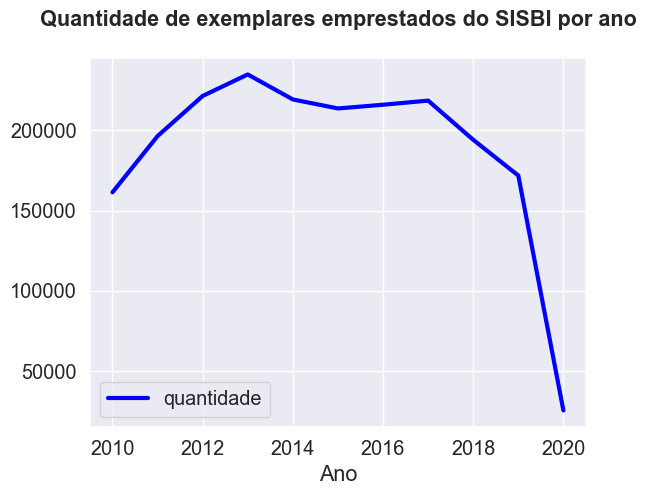

In [63]:
emprestimos_por_ano.plot(kind='line',color="blue", linestyle="-", marker="", linewidth=3, markersize=8)
plt.title("Quantidade de exemplares emprestados do SISBI por ano"+"\n",weight='bold')
plt.grid(True)
plt.show()

Percebemos que houve uma queda após 2013, com apenas um aumento em 2017, mas que parece uma excessão.

Emprestimos por mês

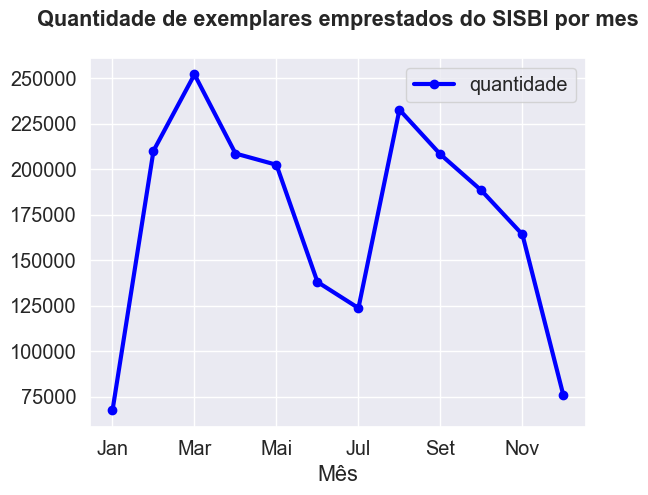

In [64]:
emprestimos_por_mes = emprestimos_data[['Mês','quantidade']].groupby(['Mês']).sum()
meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

emprestimos_por_mes.index = emprestimos_por_mes.index.map(meses)
emprestimos_por_mes
emprestimos_por_mes.plot(kind='line',color="blue", linestyle="-", marker=".", linewidth=3, markersize=12)
plt.title("Quantidade de exemplares emprestados do SISBI por mes"+"\n",weight='bold')
plt.grid(True)
plt.show()
#Adicionar comentarios

Os melhores meses para férias são os meses de Junho, Julho, Dezembro e Janeiro.

Emprestimos por hora

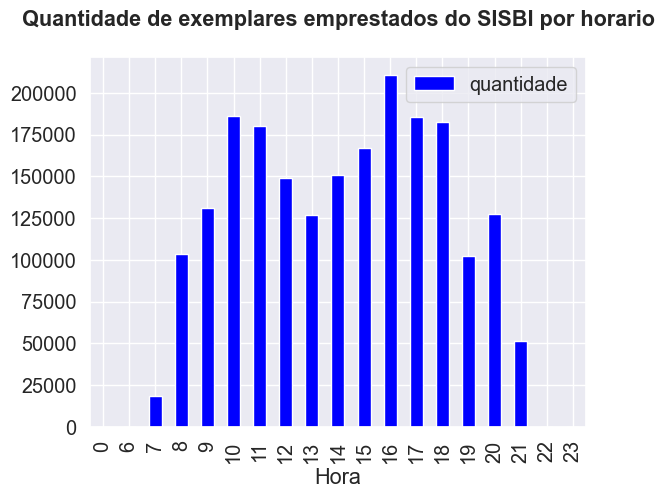

In [163]:
emprestimos_por_hora = emprestimos_data[['Hora','quantidade']].groupby(['Hora']).sum()
emprestimos_por_hora.plot(kind='bar', color="blue")
plt.title("Quantidade de exemplares emprestados do SISBI por horario"+"\n",weight='bold')
plt.show()
#Adicionar comentarios

Os melhores hórarios para outras atividades são as primeiras horas do dia e as últimas

## Dia 4

In [164]:
emprestimos_completos.tipo_vinculo_usuario.unique()

array(['ALUNO DE PÓS-GRADUAÇÃO', 'ALUNO DE GRADUAÇÃO', 'DOCENTE',
       'SERVIDOR TÉCNICO-ADMINISTRATIVO', 'USUÁRIO EXTERNO',
       'DOCENTE EXTERNO', 'ALUNO MÉDIO/TÉCNICO', 'OUTROS'], dtype=object)

In [165]:
emprestimos_completos.colecao.unique()

array(['Acervo Circulante', 'Obras de Referência', 'Multimeios',
       'Folhetos', 'Publicações de Autores do RN', 'Monografias',
       'Literatura de Cordel', 'Dissertações', 'Teses',
       'Publicações da UFRN', 'Coleção Mossoroense', 'Eventos',
       'Trabalho Acadêmico', 'Obras Raras', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [166]:
emprestimos_completos.biblioteca.unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - \xadCERES\xad - Caicó',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Moacyr de Góes - CE',
       'Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz',
       'Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos',
       'Biblioteca Setorial Prof. Rod

In [167]:
emprestimos_completos.CDU.unique()

array(['Ciências aplicadas', 'Ciências sociais.',
       'Matemática e ciências naturais',
       'Generalidades. Ciência e conhecimento.',
       'Geografia. Biografia. História', 'Belas artes', 'Religião.',
       'Linguagem. Língua. Linguística', 'Filosofia e psicologia.'],
      dtype=object)

In [168]:
def frequencia(variavel):
  dataframe = pd.DataFrame(emprestimos_completos[variavel].value_counts())                      
  dataframe.columns = ['quantidade']
  dataframe['percentual'] = round((dataframe.quantidade / dataframe.quantidade.sum())*100,1)
  return dataframe

In [169]:
frequencia('tipo_vinculo_usuario')

,quantidade,percentual
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1612324,77.8
ALUNO DE PÓS-GRADUAÇÃO,302541,14.6
DOCENTE,70981,3.4
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.6
ALUNO MÉDIO/TÉCNICO,28029,1.4
DOCENTE EXTERNO,23949,1.2
USUÁRIO EXTERNO,2509,0.1
OUTROS,5,0.0


O maior público são os alunos de graduação (78%) o segundo maior é o de pós graduação (15%).

Possilvemente a maior diferença entre os percentuais dos dois anteriores é devido a dois pontos:

Alunos de pós graduação, tem o maior enfoque em artigos científicos que são acessados através de bases de dados bibliográficas.
A maior quantidade de alunos de graduação em comparação com os da pós na universidade.

In [170]:
frequencia('colecao')

,quantidade,percentual
colecao,,
Acervo Circulante,2053120,99.1
Multimeios,7954,0.4
Monografias,4021,0.2
Dissertações,2406,0.1
Obras de Referência,1954,0.1
Publicações de Autores do RN,866,0.0
Publicações da UFRN,764,0.0
Teses,714,0.0
Folhetos,271,0.0


A principal coleção é a circulante

Monografias, dissertações e teses poderiam estar sendo mais consultadas aumentando principalmente os alunos de pós. Porém é importante verificar se esses documentos não online.

Importante verificar as obras das coleções menos utilizadas

In [171]:
frequencia('biblioteca')

,quantidade,percentual
biblioteca,,
Biblioteca Central Zila Mamede,1426122,68.8
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.7
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.7
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.2
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,3.0
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.2
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,2.0
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.5
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.4


Como esperado a biblioteca central é a mais utilizada

In [172]:
frequencia('CDU')

,quantidade,percentual
CDU,,
Ciências aplicadas,1425473,68.8
Ciências sociais.,369536,17.8
Matemática e ciências naturais,68744,3.3
Generalidades. Ciência e conhecimento.,62521,3.0
Religião.,62295,3.0
Filosofia e psicologia.,60563,2.9
Geografia. Biografia. História,7989,0.4
Belas artes,7911,0.4
Linguagem. Língua. Linguística,7490,0.4


Os percentuais estão muito desbalancedos, importante entender porque principalmente as matérias de humanas estão sendo pouco utilizadas

## Dia 5

In [173]:
aluno_graduacao = emprestimos_completos.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
aluno_graduacao.colecao.value_counts()

colecao
Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: count, dtype: int64

In [174]:
aluno_graduacao_acervo_circulante = aluno_graduacao.query('colecao == "Acervo Circulante"')
aluno_graduacao_acervo_circulante = pd.DataFrame(aluno_graduacao_acervo_circulante)
aluno_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(aluno_graduacao_acervo_circulante['data_emprestimo'])
aluno_graduacao_acervo_circulante['ano'] = aluno_graduacao_acervo_circulante['data_emprestimo'].dt.year
aluno_graduacao_acervo_circulante['mes'] = aluno_graduacao_acervo_circulante['data_emprestimo'].dt.month
aluno_graduacao_acervo_circulante = aluno_graduacao_acervo_circulante.loc[:,['ano','mes']]
aluno_graduacao_acervo_circulante = aluno_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
aluno_graduacao_acervo_circulante

,ano,mes,quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


In [175]:
def gera_box_plot(dataset,x,y,titulo,subtitulo):
  '''
  Esta função irá gerar um gráfico
  Dataset = conjunto de dados do gráfico
  x = valor do eixo x do gráfico
  y = valor do eixo y do gráfico
  título = título do gráfico
  subtitulo = subtitulo do texto
  '''
  sns.set_theme(style="darkgrid", palette="Blues", font_scale=1.3)                    
  plt.figure(figsize=(16,10))                                                           
  ax = sns.boxplot(y=y, x=x, data=dataset, palette="Blues")                                           
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))                
  plt.ylim(0,max(dataset[y])*1.1) #Definir o limite do eixo y
  plt.xlabel(None)                                                                     
  plt.ylabel(None)                                                                    
  ax.set_title(titulo+"\n",size=20,loc='left',weight='bold')
  ax.text(s=subtitulo,x=-0.5,y=max(dataset[y])*1.11,fontsize=18, ha='left',color='gray')

C:\Users\renat\AppData\Local\Temp\ipykernel_15108\2156773477.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=y, x=x, data=dataset, palette="Blues")


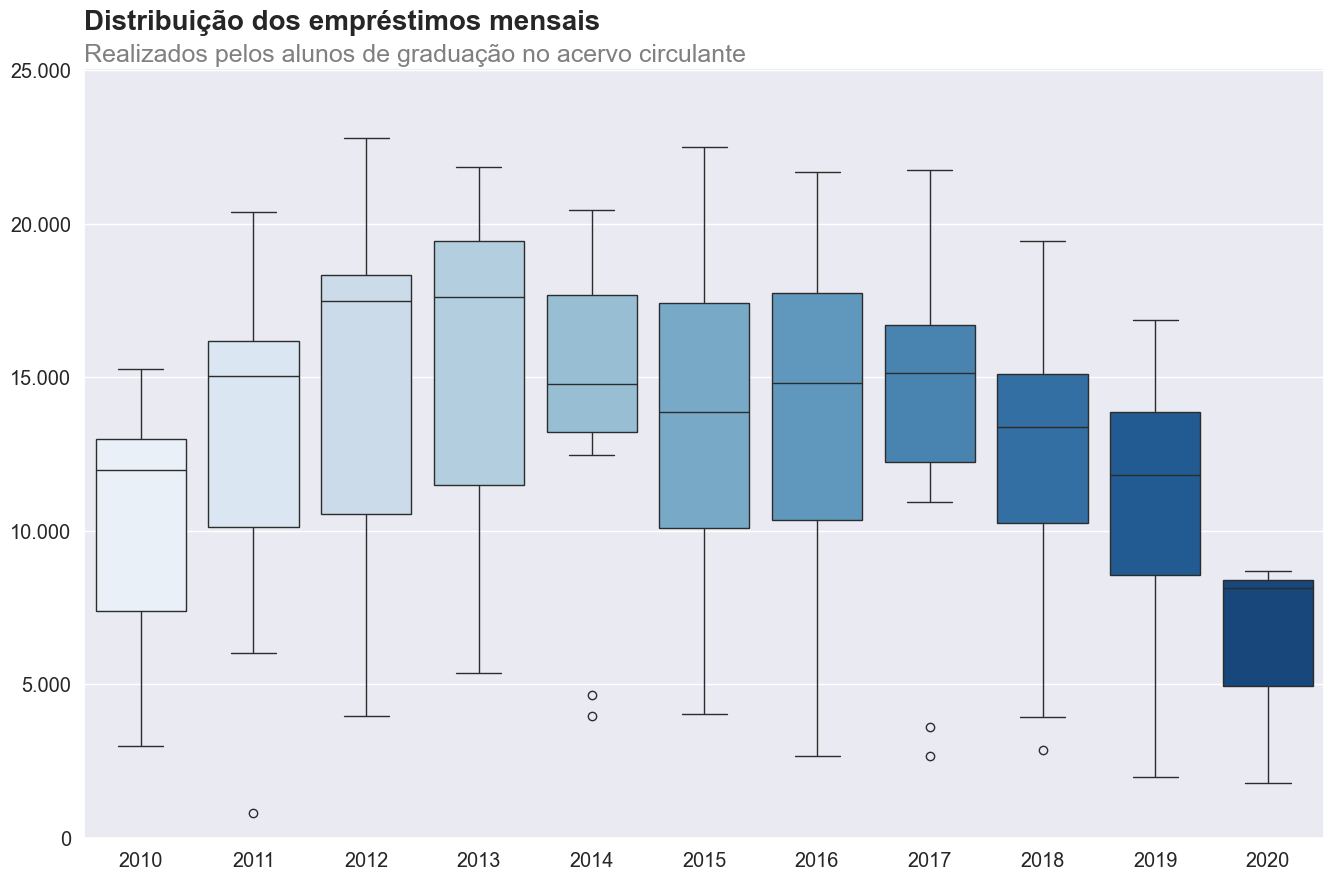

In [176]:
gera_box_plot(aluno_graduacao_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'Realizados pelos alunos de graduação no acervo circulante')

In [177]:
alunos_pos_graduacao = emprestimos_completos.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_pos_graduacao.colecao.value_counts()

colecao
Acervo Circulante                        299201
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Coleção Mossoroense                          23
Trabalho Acadêmico                           23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: count, dtype: int64

In [178]:
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao.query('colecao == "Acervo Circulante"')
alunos_pos_graduacao_acervo_circulante = pd.DataFrame(alunos_pos_graduacao_acervo_circulante)
alunos_pos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_pos_graduacao_acervo_circulante['data_emprestimo'])
alunos_pos_graduacao_acervo_circulante['ano'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_pos_graduacao_acervo_circulante['mes'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.loc[:,['ano','mes']]
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
alunos_pos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1105
121,2019,12,1069
122,2011,1,465


C:\Users\renat\AppData\Local\Temp\ipykernel_15108\2156773477.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=y, x=x, data=dataset, palette="Blues")


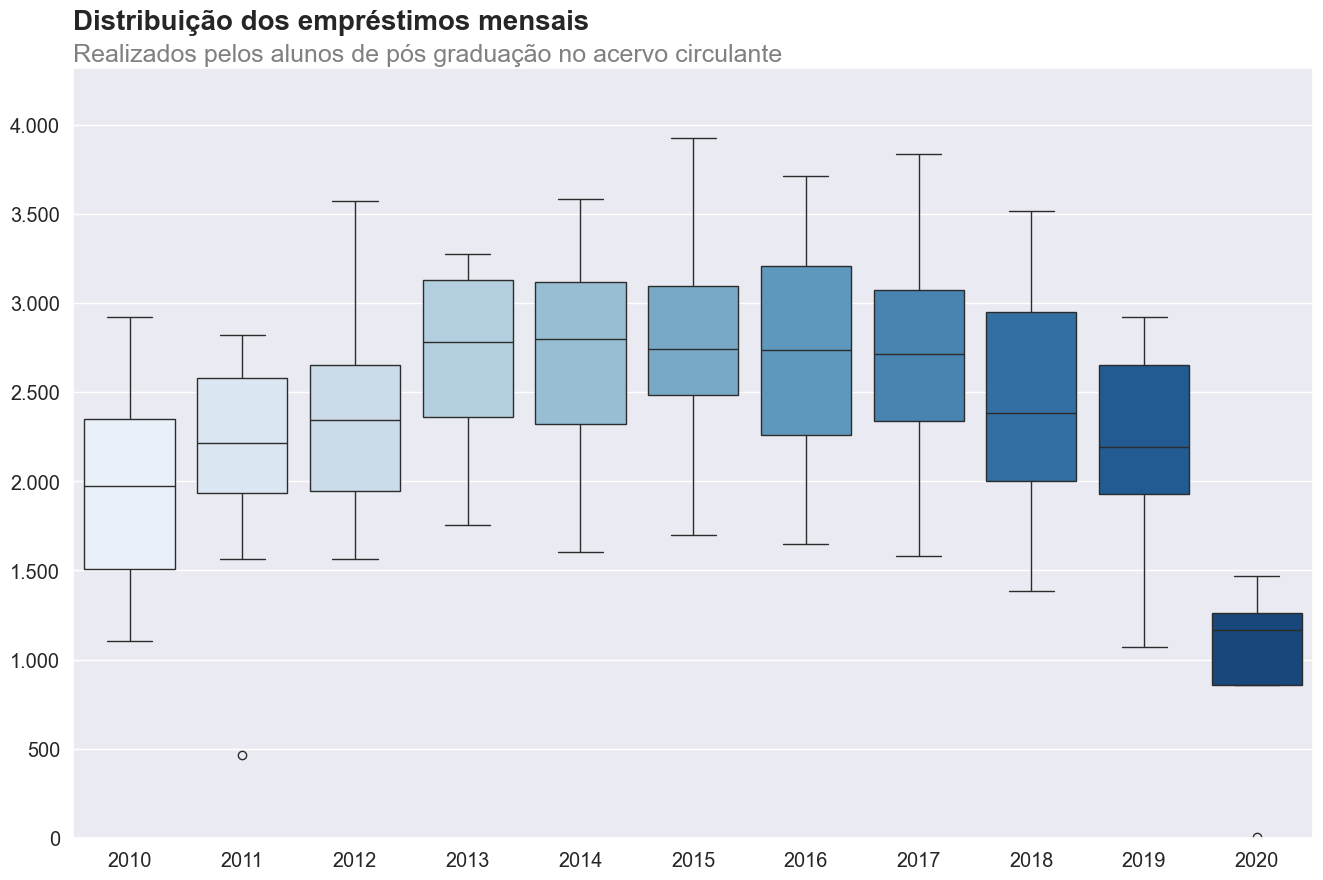

In [179]:
gera_box_plot(alunos_pos_graduacao_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'Realizados pelos alunos de pós graduação no acervo circulante')

## Dia 6

In [180]:
cadastro_usuarios_antes_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Até 2010',skiprows=1)

In [181]:
cadastro_usuarios_depois_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Após 2010',skiprows=1)

In [182]:
cadastro_usuarios_antes_2010
cadastro_usuarios_antes_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']
cadastro_usuarios_depois_2010
cadastro_usuarios_depois_2010.columns= ['matricula_ou_siape','tipo_vinculo_usuario','curso']
cadastro_usuarios_excel = pd.concat([cadastro_usuarios_antes_2010,cadastro_usuarios_depois_2010],ignore_index=True)
cadastro_usuarios_excel.matricula_ou_siape = cadastro_usuarios_excel.matricula_ou_siape.astype('string')
cadastro_usuarios_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
9995,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
9996,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
9997,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
9998,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [183]:
cadastro_usuarios_json = pd.read_json('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json')
cadastro_usuarios_json

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [196]:
cadastro_usuarios_graduacao_json = pd.read_json(cadastro_usuarios_json.registros[0])
cadastro_usuarios_graduacao_json

C:\Users\renat\AppData\Local\Temp\ipykernel_15108\2872641608.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cadastro_usuarios_graduacao_json = pd.read_json(cadastro_usuarios_json.registros[0])


,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [197]:
cadastro_usuarios_graduacao_json.matricula_ou_siape = cadastro_usuarios_graduacao_json.matricula_ou_siape.astype('float')
cadastro_usuarios_graduacao_json.matricula_ou_siape = cadastro_usuarios_graduacao_json.matricula_ou_siape.astype('string')

In [198]:
cadastro_usuarios_cursos = pd.concat([cadastro_usuarios_excel,cadastro_usuarios_graduacao_json],ignore_index=True)
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [199]:
matricula_data_de_emprestimo = emprestimos_completos.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")
matricula_data_de_emprestimo = matricula_data_de_emprestimo.loc[:,['matricula_ou_siape','data_emprestimo']]
matricula_data_de_emprestimo = matricula_data_de_emprestimo.query('data_emprestimo > 2015')
matricula_data_de_emprestimo = matricula_data_de_emprestimo.reset_index(drop=True)
matricula_data_de_emprestimo

,matricula_ou_siape,data_emprestimo
0,2012957958.0,2016-02-14 18:15:01.198
1,2012957958.0,2016-12-21 17:46:58.558
2,2012957958.0,2017-02-14 18:15:01.198
3,20170030251.0,2019-10-04 10:29:10.420
4,20170129345.0,2017-08-25 18:58:43.097
...,...,...
788099,2016053027.0,2019-12-26 11:35:27.703
788100,20180063096.0,2019-12-26 16:35:09.711
788101,20160141097.0,2019-12-27 14:51:13.223
788102,20160100835.0,2019-12-27 19:07:44.519


In [200]:
matricula_data_de_emprestimo.isna().sum()

matricula_ou_siape    94
data_emprestimo        0
dtype: int64

In [201]:
matricula_data_de_emprestimo = matricula_data_de_emprestimo.dropna()

In [202]:
matricula_data_de_emprestimo['matricula_ou_siape'] = matricula_data_de_emprestimo['matricula_ou_siape'].astype('string')
matricula_data_de_emprestimo

C:\Users\renat\AppData\Local\Temp\ipykernel_15108\276958907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matricula_data_de_emprestimo['matricula_ou_siape'] = matricula_data_de_emprestimo['matricula_ou_siape'].astype('string')


,matricula_ou_siape,data_emprestimo
0,2012957958.0,2016-02-14 18:15:01.198
1,2012957958.0,2016-12-21 17:46:58.558
2,2012957958.0,2017-02-14 18:15:01.198
3,20170030251.0,2019-10-04 10:29:10.420
4,20170129345.0,2017-08-25 18:58:43.097
...,...,...
788099,2016053027.0,2019-12-26 11:35:27.703
788100,20180063096.0,2019-12-26 16:35:09.711
788101,20160141097.0,2019-12-27 14:51:13.223
788102,20160100835.0,2019-12-27 19:07:44.519


In [203]:
cadastro_usuarios_cursos_selecionados = cadastro_usuarios_cursos.query("curso == ['BIBLIOTECONOMIA','CIÊNCIAS SOCIAIS','COMUNICAÇÃO SOCIAL','DIREITO','FILOSOFIA','PEDAGOGIA']")
cadastro_usuarios_cursos_selecionados

,matricula_ou_siape,tipo_vinculo_usuario,curso
8,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
9,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
15,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
18,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
19,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
72789,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72796,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [205]:
cadastro_usuarios_cursos_selecionados_pv = pd.merge(matricula_data_de_emprestimo,cadastro_usuarios_cursos_selecionados,how='inner',on='matricula_ou_siape')
cadastro_usuarios_cursos_selecionados_pv

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20190153535.0,2020-01-02 08:36:40.163,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,20190153535.0,2019-08-23 17:27:39.677,ALUNO DE GRADUAÇÃO,FILOSOFIA
2,20190153535.0,2020-02-17 15:45:33.953,ALUNO DE GRADUAÇÃO,FILOSOFIA
3,20190153535.0,2020-02-17 15:45:33.989,ALUNO DE GRADUAÇÃO,FILOSOFIA
4,20190153535.0,2020-02-18 15:45:53.279,ALUNO DE GRADUAÇÃO,FILOSOFIA
...,...,...,...,...
212833,20190114260.0,2019-10-01 19:31:53.059,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
212834,20190128149.0,2019-10-07 17:37:56.259,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
212835,20170164916.0,2019-10-23 09:04:18.183,ALUNO DE GRADUAÇÃO,COMUNICAÇÃO SOCIAL
212836,20190118447.0,2019-10-24 14:58:20.724,ALUNO DE GRADUAÇÃO,PEDAGOGIA


In [215]:
cadastro_usuarios_cursos_selecionados_pv['data_emprestimo']=cadastro_usuarios_cursos_selecionados_pv['data_emprestimo'].dt.year

In [216]:
emprestimos_cursos_selecionados = cadastro_usuarios_cursos_selecionados_pv.iloc[:,[1,3]].value_counts().reset_index()

In [217]:
emprestimos_cursos_selecionados.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']

In [218]:
emprestimos_cursos_selecionados

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2017,COMUNICAÇÃO SOCIAL,8253
1,2016,COMUNICAÇÃO SOCIAL,7973
2,2017,DIREITO,7885
3,2015,BIBLIOTECONOMIA,7784
4,2015,DIREITO,7665
5,2016,FILOSOFIA,7576
6,2015,CIÊNCIAS SOCIAIS,7489
7,2017,PEDAGOGIA,7434
8,2017,FILOSOFIA,7389
9,2016,DIREITO,7363


In [219]:
emprestimos_tipo_usuario_curso_pivot = emprestimos_cursos_selecionados.pivot_table(
        index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE_EMPRESTIMOS',
        fill_value = '-',
        aggfunc= sum,
        margins = True,
        margins_name = 'TOTAL',
)
emprestimos_tipo_usuario_curso_pivot

C:\Users\renat\AppData\Local\Temp\ipykernel_15108\994587600.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  emprestimos_tipo_usuario_curso_pivot = emprestimos_cursos_selecionados.pivot_table(
C:\Users\renat\AppData\Local\Temp\ipykernel_15108\994587600.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  emprestimos_tipo_usuario_curso_pivot = emprestimos_cursos_selecionados.pivot_table(
C:\Users\renat\AppData\Local\Temp\ipykernel_15108\994587600.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be

ANO,2015,2016,2017,2018,2019,2020,TOTAL
CURSO,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
TOTAL,44224,44087,45186,39353,34864,5124,212838


## Dia 7

In [220]:
cadastro_usuarios_antes_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Até 2010',skiprows=1)
cadastro_usuarios_depois_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Após 2010',skiprows=1)

In [221]:
cadastro_usuarios_antes_2010

,Número da matrícula,Tipo de vinculo,Curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2.009075e+09,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2.009075e+09,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2.009075e+09,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2.009075e+09,ALUNO DE GRADUAÇÃO,MÚSICA


In [222]:
cadastro_usuarios_antes_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']

In [223]:

cadastro_usuarios_depois_2010

,Matricula,Tipo de vinculo,Cursos
0,2.010000e+09,ALUNO DE GRADUAÇÃO,DIREITO
1,2.010000e+09,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2.010001e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2.010003e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2.010003e+09,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2269,2.015012e+10,ALUNO DE GRADUAÇÃO,LETRAS
2270,2.015075e+09,ALUNO DE GRADUAÇÃO,DANÇA
2271,2.016000e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2272,2.017009e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [224]:
cadastro_usuarios_depois_2010.columns= ['matricula_ou_siape','tipo_vinculo_usuario','curso']

In [225]:
cadastro_usuarios_excel = pd.concat([cadastro_usuarios_antes_2010,cadastro_usuarios_depois_2010],ignore_index=True)
cadastro_usuarios_excel.matricula_ou_siape = cadastro_usuarios_excel.matricula_ou_siape.astype('string')
cadastro_usuarios_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
9995,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
9996,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
9997,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
9998,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [226]:
cadastro_usuarios_json = pd.read_json('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json')
cadastro_usuarios_json

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [228]:
cadastro_usuarios_posgraduacao_json = pd.read_json(cadastro_usuarios_json.registros[1])
cadastro_usuarios_posgraduacao_json
     

C:\Users\renat\AppData\Local\Temp\ipykernel_15108\505392144.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cadastro_usuarios_posgraduacao_json = pd.read_json(cadastro_usuarios_json.registros[1])


,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [229]:
cadastro_usuarios_posgraduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  int64 
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: int64(1), object(2)
memory usage: 455.8+ KB


In [230]:
cadastro_usuarios_posgraduacao_json.matricula_ou_siape = cadastro_usuarios_posgraduacao_json.matricula_ou_siape.astype('float')
cadastro_usuarios_posgraduacao_json.matricula_ou_siape = cadastro_usuarios_posgraduacao_json.matricula_ou_siape.astype('string')
cadastro_usuarios_posgraduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  string
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: object(2), string(1)
memory usage: 455.8+ KB


In [231]:
cadastro_usuarios_cursos = pd.concat([cadastro_usuarios_excel,cadastro_usuarios_posgraduacao_json],ignore_index=True)
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
29435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
29436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
29437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
29438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [232]:
cadastro_usuarios_cursos_pos_graduacao = cadastro_usuarios_posgraduacao_json.query("tipo_vinculo_usuario == 'ALUNO DE PÓS-GRADUAÇÃO'")
cadastro_usuarios_cursos_pos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [233]:

matricula_data_de_emprestimo_pos_graduacao = emprestimos_completos.loc[:,['matricula_ou_siape','data_emprestimo']]
matricula_data_de_emprestimo_pos_graduacao = matricula_data_de_emprestimo_pos_graduacao.query('data_emprestimo > 2017')
matricula_data_de_emprestimo_pos_graduacao = matricula_data_de_emprestimo_pos_graduacao.reset_index(drop=True)
matricula_data_de_emprestimo_pos_graduacao

,matricula_ou_siape,data_emprestimo
0,20181028903.0,2020-01-02 08:17:30.290
1,2012957958.0,2017-02-14 18:15:01.198
2,20161009526.0,2017-05-05 17:11:54.811
3,20171011930.0,2017-07-28 17:56:01.702
4,20161009464.0,2018-01-16 17:18:56.605
...,...,...
609948,20191008539.0,2019-12-27 17:31:10.417
609949,20160100835.0,2019-12-27 19:07:44.519
609950,20171025200.0,2019-12-30 11:05:00.992
609951,2013024630.0,2019-12-30 11:38:19.107


In [234]:
emprestimos_pos_graduacao_desde_2017 = matricula_data_de_emprestimo_pos_graduacao.merge(cadastro_usuarios_cursos_pos_graduacao)
emprestimos_pos_graduacao_desde_2017

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20181028903.0,2020-01-02 08:17:30.290,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
1,20181028903.0,2019-11-08 12:40:16.760,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
2,20181028903.0,2020-01-02 08:17:30.436,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
3,20181028903.0,2020-01-07 11:25:23.133,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
4,20181028903.0,2020-01-07 11:25:23.169,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
...,...,...,...,...
92057,20191021675.0,2019-10-16 08:59:22.003,ALUNO DE PÓS-GRADUAÇÃO,ADMINISTRAÇÃO
92058,20191025306.0,2019-10-16 10:44:36.839,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
92059,20191026804.0,2019-10-16 21:16:07.744,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIA E ENGENHARIA DE MATERIAIS
92060,20181022300.0,2019-11-04 12:23:44.617,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO


In [235]:
emprestimos_pos_graduacao_desde_2017.data_emprestimo = emprestimos_pos_graduacao_desde_2017.data_emprestimo.dt.year


In [236]:
emprestimos_pos_graduacao_desde_2017 = emprestimos_pos_graduacao_desde_2017.iloc[:,[1,3]].value_counts().reset_index()
emprestimos_pos_graduacao_desde_2017.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimos_pos_graduacao_desde_2017.head()

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2018,CIÊNCIAS ODONTOLÓGICAS,2540
1,2017,ADMINISTRAÇÃO,2538
2,2017,ENGENHARIA DE SOFTWARE,2477
3,2017,CIÊNCIAS DA SAÚDE,2434
4,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415


In [237]:
emprestimos_pos_graduacao_e_curso_pivot = emprestimos_pos_graduacao_desde_2017.pivot_table(
        index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE_EMPRESTIMOS'
)
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,2538.0,2316.0,1692.0,269.0
ARQUITETURA E URBANISMO,2209.0,1917.0,1818.0,257.0
ARTES CÊNICAS,2115.0,2082.0,1812.0,229.0
BIOINFORMÁTICA,2190.0,1914.0,1825.0,263.0
BIOQUÍMICA,2294.0,1944.0,2057.0,272.0
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316.0,2110.0,2008.0,328.0
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415.0,2365.0,2026.0,303.0
CIÊNCIAS DA SAÚDE,2434.0,1986.0,1825.0,234.0
CIÊNCIAS ODONTOLÓGICAS,2414.0,2540.0,2134.0,352.0


In [239]:
previsao_2022 = pd.read_table('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_7-Apresentando_resultados_em_HTML/Dataset/previsao')
previsao_2022 = previsao_2022['curso previsao_2022'].str.split(' ',expand=True)
previsao_2022

,0,1
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [240]:
previsao_2022.index = emprestimos_pos_graduacao_e_curso_pivot.index
emprestimos_pos_graduacao_e_curso_pivot['2022'] = previsao_2022.iloc[:,1]
emprestimos_pos_graduacao_e_curso_pivot
     

ANO,2017,2018,2019,2020,2022
CURSO,,,,,
ADMINISTRAÇÃO,2538.0,2316.0,1692.0,269.0,1905
ARQUITETURA E URBANISMO,2209.0,1917.0,1818.0,257.0,1896
ARTES CÊNICAS,2115.0,2082.0,1812.0,229.0,1920
BIOINFORMÁTICA,2190.0,1914.0,1825.0,263.0,2302
BIOQUÍMICA,2294.0,1944.0,2057.0,272.0,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316.0,2110.0,2008.0,328.0,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415.0,2365.0,2026.0,303.0,1960
CIÊNCIAS DA SAÚDE,2434.0,1986.0,1825.0,234.0,1730
CIÊNCIAS ODONTOLÓGICAS,2414.0,2540.0,2134.0,352.0,2405


In [242]:
emprestimos_pos_graduacao_e_curso_pivot['2022'] = emprestimos_pos_graduacao_e_curso_pivot['2022'].astype('int')
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020,2022
CURSO,,,,,
ADMINISTRAÇÃO,2538.0,2316.0,1692.0,269.0,1905
ARQUITETURA E URBANISMO,2209.0,1917.0,1818.0,257.0,1896
ARTES CÊNICAS,2115.0,2082.0,1812.0,229.0,1920
BIOINFORMÁTICA,2190.0,1914.0,1825.0,263.0,2302
BIOQUÍMICA,2294.0,1944.0,2057.0,272.0,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316.0,2110.0,2008.0,328.0,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415.0,2365.0,2026.0,303.0,1960
CIÊNCIAS DA SAÚDE,2434.0,1986.0,1825.0,234.0,1730
CIÊNCIAS ODONTOLÓGICAS,2414.0,2540.0,2134.0,352.0,2405


In [243]:
def diferenca_percentual_ano_anterior(x,y):
  return round(((x / y * 100) - 100),2)

In [245]:
percentual_2018 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,1],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,0])
percentual_2019 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,2],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,1])
percentual_2022 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,3],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,2])
percentual = pd.DataFrame({'2018':percentual_2018,
                           '2019':percentual_2019,
                           '2022':percentual_2022})
percentual

,2018,2019,2022
CURSO,,,
ADMINISTRAÇÃO,-8.75,-26.94,-84.10
ARQUITETURA E URBANISMO,-13.22,-5.16,-85.86
ARTES CÊNICAS,-1.56,-12.97,-87.36
BIOINFORMÁTICA,-12.60,-4.65,-85.59
BIOQUÍMICA,-15.26,5.81,-86.78
CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89,-4.83,-83.67
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07,-14.33,-85.04
CIÊNCIAS DA SAÚDE,-18.41,-8.11,-87.18
CIÊNCIAS ODONTOLÓGICAS,5.22,-15.98,-83.51


In [246]:
percentual.reset_index(inplace=True)
percentual.columns = percentual.columns.str.capitalize()
percentual.Curso = percentual.Curso.str.capitalize()
percentual

,Curso,2018,2019,2022
0,Administração,-8.75,-26.94,-84.10
1,Arquitetura e urbanismo,-13.22,-5.16,-85.86
2,Artes cênicas,-1.56,-12.97,-87.36
3,Bioinformática,-12.60,-4.65,-85.59
4,Bioquímica,-15.26,5.81,-86.78
5,Ciência e engenharia de materiais,-8.89,-4.83,-83.67
6,"Ciência, tecnologia e inovação",-2.07,-14.33,-85.04
7,Ciências da saúde,-18.41,-8.11,-87.18
8,Ciências odontológicas,5.22,-15.98,-83.51
9,Design,-19.10,0.16,-86.20


HTML

In [249]:
th_props = [
  ('font-size', '1.4rem'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', 'whitesmoke'),
  ('background-color', '#001692'),
  ('border-radius', '0.25rem'),
  ('box-shadow','0 0 1rem gray')
  ]
td_props = [
  ('font-size', '1rem'),
  ('padding','0.5rem'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('border-bottom','0.1rem solid lightgray')
  ]
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

In [255]:
percentual.style.text_gradient(cmap='RdYlGn',low=1, axis=1,vmax=0.1,vmin=0)\
                              .format('{:.2f} %',subset=['2018','2019','2022'])\
                              .set_table_styles(styles)\
                              .to_html('tabela_front.html',doctype_html =True,
                                       table_attributes='ALIGN=LEFT WIDTH=50% CELLSPACING = 5')